In [47]:
import kdegree
import networkx as nx
import numpy as np

I'm gonna select the degree k and the dataset to anonymize:

In [48]:
# file_graph = "Dataset/graph_friend_5_10_5.csv"
file_graph = "Dataset/graph_friend_100_10_100.csv"
k = 5

Then the dataset must be properly parsed to a graph. For now, it's basically a list of lists. 

['Timmings', 'Conlin', 'Jude', 'Smeeton', 'Gubbins', 'Lead', 'Jeanes', 'Cummings', 'Selden', 'Newton', 'Clavering', 'Ching', 'Quinton', 'Boulding', 'Cuckson', 'Weyman', 'Fillingham', 'Merrills', 'Tackley', 'Hallett', 'Kings', 'Pibbles', 'Follows', 'Sidey', 'Lanigan', 'Allmond', 'Bendals', 'Samuels', 'Atfield', 'Sympson', 'Broughton', 'Housley', 'Kneller', 'Birchell', 'Mobbs', 'Wardell', 'Mollyneux', 'Embleton', 'Vinson', 'Lauer', 'Jorey', 'Kiernan', 'Surbats', 'Gilfellon', 'Gabb', 'Gwyther', 'Bray', 'Wainwright', 'Hextall', 'Bloye', 'Bellwood', 'Littleton', 'Trueman', 'Burnston', 'Stinnard', 'Child', 'Sampayo', 'Seagur', 'Margetts', 'Leightley', 'Chappel', 'Stanaway', 'Berton', 'Hows', 'Wotton', 'Gauge', 'Boothroyd', 'Pim', 'Burchett', 'Christie', 'Punyard', 'Wace', 'Mullinger', 'Hincks', 'Pymer', 'Moorfield', 'Dhoerty', 'Sleigh', 'Sugar', 'Gilbart', 'Broderick', 'Onillon', 'Walley', 'Stillwell', 'Chalke', 'Chatterson', 'Goldspink', 'Chilcott', 'Warhurst', 'Rands', 'Bourke', 'Hardstaff

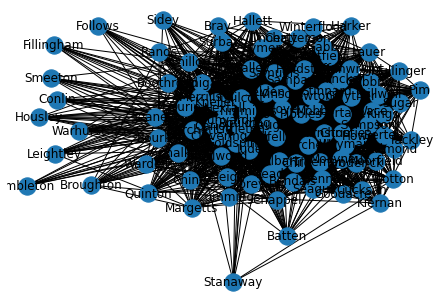

In [49]:
G = nx.Graph()
    
if os.path.exists(file_graph): 
    # if file exist
    with open(file_graph) as f:
        content = f.readlines()
    # read each line
    content = [x.strip() for x in content]
    for line in content:
        # split name inside each line
        names = line.split(",")
        start_node = names[0]
        if start_node not in G:
            G.add_node(start_node)
        for index in range(1, len(names)):
            node_to_add = names[index]
            if node_to_add not in G:
                G.add_node(node_to_add)
            G.add_edge(start_node, node_to_add)

print(G.nodes)
nx.draw(G, with_labels=True)

In d there are all the degrees of the nodes.

In [50]:
# Degree arrays preparation
graph_degrees = [x[1] for x in G.degree()]
print(f"graph_degrees = {graph_degrees}")

graph_degrees = [97, 15, 74, 12, 54, 52, 41, 38, 74, 65, 62, 37, 25, 96, 33, 56, 11, 62, 33, 30, 53, 62, 13, 21, 59, 48, 46, 65, 51, 49, 17, 14, 72, 64, 72, 33, 53, 10, 64, 43, 51, 31, 30, 76, 38, 45, 29, 57, 78, 64, 64, 97, 52, 57, 65, 47, 67, 43, 32, 14, 41, 10, 56, 59, 30, 89, 42, 38, 58, 53, 75, 58, 42, 56, 43, 55, 38, 40, 45, 49, 51, 44, 50, 56, 38, 35, 76, 83, 17, 27, 38, 63, 34, 42, 25, 51, 48, 64, 65, 23]


Now we can pass apply the anonymization. There are two main algorithms to do so.

To use d in the greedy algorithm, this must be sorted. In array_degrees there is the sorted degrees listed.

In [51]:
array_index = np.argsort(graph_degrees)[::-1]
d = np.sort(graph_degrees)[::-1]
print("Array of degrees sorted (d):\n {}".format(d))

Array of degrees sorted (d):
 [97 97 96 89 83 78 76 76 75 74 74 72 72 67 65 65 65 65 64 64 64 64 64 63
 62 62 62 59 59 58 58 57 57 56 56 56 56 55 54 53 53 53 52 52 51 51 51 51
 50 49 49 48 48 47 46 45 45 44 43 43 43 42 42 42 41 41 40 38 38 38 38 38
 38 37 35 34 33 33 33 32 31 30 30 30 29 27 25 25 23 21 17 17 15 14 14 13
 12 11 10 10]


## Dynamic Programming Algorithm

In [74]:
%%time

dp_result = kdegree.dp_algorithm(d, k)
print(dp_result)

[97, 97, 97, 97, 97, 78, 78, 78, 78, 78, 74, 74, 74, 74, 74, 65, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 64, 59, 59, 59, 59, 59, 59, 56, 56, 56, 56, 56, 56, 53, 53, 53, 53, 53, 51, 51, 51, 51, 51, 49, 49, 49, 49, 49, 49, 45, 45, 45, 45, 45, 45, 42, 42, 42, 42, 42, 42, 38, 38, 38, 38, 38, 38, 38, 38, 34, 34, 34, 34, 34, 31, 31, 31, 31, 31, 27, 27, 27, 27, 27, 17, 17, 17, 17, 17, 13, 13, 13, 13, 13]
Wall time: 2.99 ms


## Greedy Algorithm 

In [106]:
%%time

greedy_result = kdegree.greedy_algorithm(d,k)

Wall time: 0 ns


## Comparation between DP and Greedy

In [54]:
def compute_cost(d, k_anonymized_d):
    cost = 0
    for i in range(len(d)): 
        cost += (k_anonymized_d[i] - d[i])
    return cost

if greedy_result == dp_result: 
    print("The algorithms have returned the same result.")
else:
    print("The algorithms have returned two different results.")
    print(f"The cost of the dp algorithm was {compute_cost(d, dp_result)}")
    print(f"The cost of the greedy algorithm was {compute_cost(d, greedy_result)}")





The algorithms have returned two different results.
The cost of the dp algorithm was 140
The cost of the greedy algorithm was 162


## Costructing Graph

In [108]:
# anon_graph = kdegree.construct_graph(list(range(8)), [8,7,7,6,3,2,2,1])
# print(anon_graph)
# nx.draw(anon_graph)

None


TypeError: 'NoneType' object is not iterable